Integration of m_LCA1-2, h_LCA1-5, T

In [13]:
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import numpy as np
import pandas as pd

In [14]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, color_map = 'viridis_r')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.3 numpy==1.21.6 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.6


# Read  and combine filtered datasets

In [15]:
results_file = 'write_LCA/integrated_LCA_T_harmony.h5ad'  # harmony integrated , unified human symbols, mt/rib/cell-cycle genes removed

In [4]:
adatas = sc.read_h5ad(results_file)

Read each filtered data.Use the logtransformed normalized counts.

In [16]:
adata_m_T=sc.read_h5ad("write_LCA/m_LCA1-2_T_v2.h5ad")
adata_h_T=sc.read_h5ad("write_LCA/h_LCA1-5_T_v2.h5ad")

In [17]:
adata_m=adata_m_T.raw.to_adata()
adata_h=adata_h_T.raw.to_adata()

Add species to obs.key

In [18]:
adata_m.obs['species']='mouse'
adata_h.obs['species']='human'

### Convert mouse gene names to human gene names:

In [19]:
hom_dict = np.load('write_LCA/hom_dict_v2.npy',allow_pickle=True).item() # load the 1:1 homolog dictionary

#### convert mouse genes

In [20]:
mouse_symbols = list(adata_m.var_names)

In [21]:
mouse_convert_symbols = [] # human homologs
n_miss = 0 # number of genes not found in the dictionary
for mouse_symbol in mouse_symbols:
    try:
        mouse_convert_symbols.append(hom_dict[mouse_symbol])
    except KeyError:
        mouse_convert_symbols.append('miss-'+str(n_miss))
        n_miss +=1
        print(mouse_symbol+' not found') # print genes not found in the homolog conversion dictionary

0610007P14Rik not found
0610009B22Rik not found
0610009L18Rik not found
0610009O20Rik not found
0610010F05Rik not found
0610011F06Rik not found
0610037L13Rik not found
1110001J03Rik not found
1110004E09Rik not found
1110007C09Rik not found
1110008F13Rik not found
1110008L16Rik not found
1110008P14Rik not found
1110012L19Rik not found
1110025L11Rik not found
1110034G24Rik not found
1110037F02Rik not found
1110057P08Rik not found
1190002N15Rik not found
1190003K10Rik not found
1190005I06Rik not found
1200014J11Rik not found
1300017J02Rik not found
1500009C09Rik not found
1500011B03Rik not found
1500011K16Rik not found
1500012F01Rik not found
1500015O10Rik not found
1520401A03Rik not found
1600002H07Rik not found
1600002K03Rik not found
1600014C23Rik not found
1600014K23Rik not found
1600015I10Rik not found
1600029O15Rik not found
1700001C02Rik not found
1700001C19Rik not found
1700001F09Rik not found
1700001J03Rik not found
1700001J11Rik not found
1700001K19Rik not found
1700003H04Rik no

In [22]:
print('mouse genes without 1:1 homologous human genes in adata_m: '+str(n_miss))
print('mouse genes in adata_m: '+str(len(mouse_symbols)))
print('mouse genes converted successfully to human homologs in adata_m: '+str(len(mouse_symbols)-n_miss))

mouse genes without 1:1 homologous human genes in adata_m: 12292
mouse genes in adata_m: 27656
mouse genes converted successfully to human homologs in adata_m: 15364


In [23]:
adata_m.var_names = mouse_convert_symbols

In [12]:
adata_m.var_names

Index(['miss-0', 'miss-1', 'miss-2', 'miss-3', 'miss-4', 'C17orf49', 'miss-5',
       'C2orf68', 'miss-6', 'C4orf19',
       ...
       'ZWINT', 'miss-12290', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1',
       'ZZZ3', 'ASIP', 'miss-12291'],
      dtype='object', length=27656)

### Combine different datasets

In [24]:
adatas=[adata_m,adata_h]

In [25]:
adatas = ad.concat(adatas, merge = "same")

In [26]:
adatas

AnnData object with n_obs × n_vars = 12417 × 15145
    obs: 'Barcode', 'Library', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'label_singleR', 'leiden', 'lymphoid', 'label_rough', 'label_subtype', 'label_subtype_hres', 'species'
    var: 'mt'
    obsm: 'X_pca', 'X_umap'

In [27]:
adatas.write(results_file)

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Barcode' as categorical
/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Library' as categorical
/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reor

# Identify highly-variable genes.

In [28]:

sc.pp.highly_variable_genes(adatas) 

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


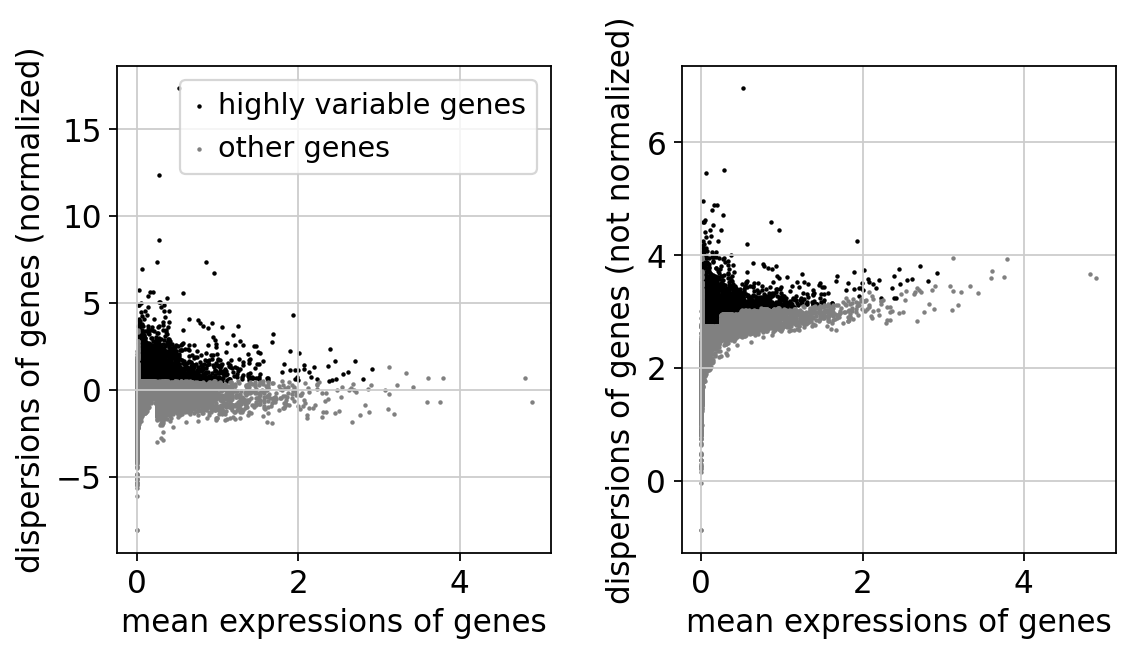

In [29]:
sc.pl.highly_variable_genes(adatas)

In [30]:
adatas.raw = adatas

In [31]:
adatas = adatas[:, adatas.var.highly_variable]

In [32]:
sc.pp.regress_out(adatas, ['total_counts','pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:44)


In [33]:
sc.pp.scale(adatas, max_value=10)

In [34]:
adatas

AnnData object with n_obs × n_vars = 12417 × 3631
    obs: 'Barcode', 'Library', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'label_singleR', 'leiden', 'lymphoid', 'label_rough', 'label_subtype', 'label_subtype_hres', 'species'
    var: 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg'
    obsm: 'X_pca', 'X_umap'

# Principal component analysis

In [35]:
sc.tl.pca(adatas, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)


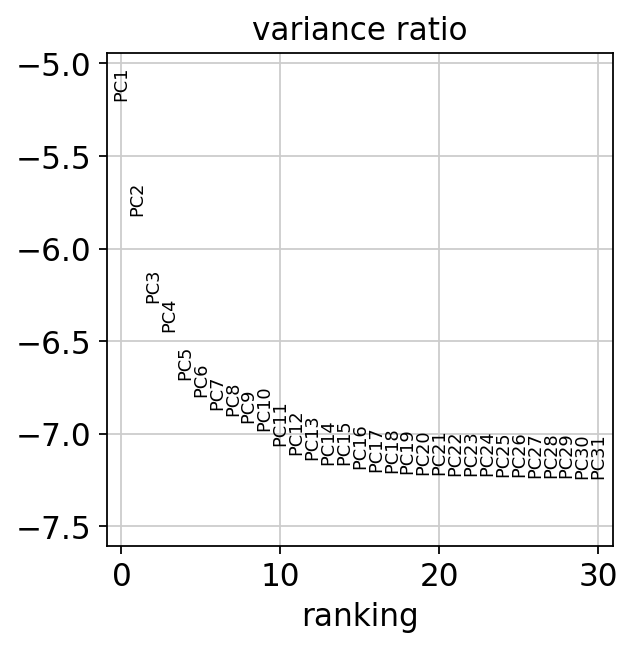

In [36]:
sc.pl.pca_variance_ratio(adatas, log=True)

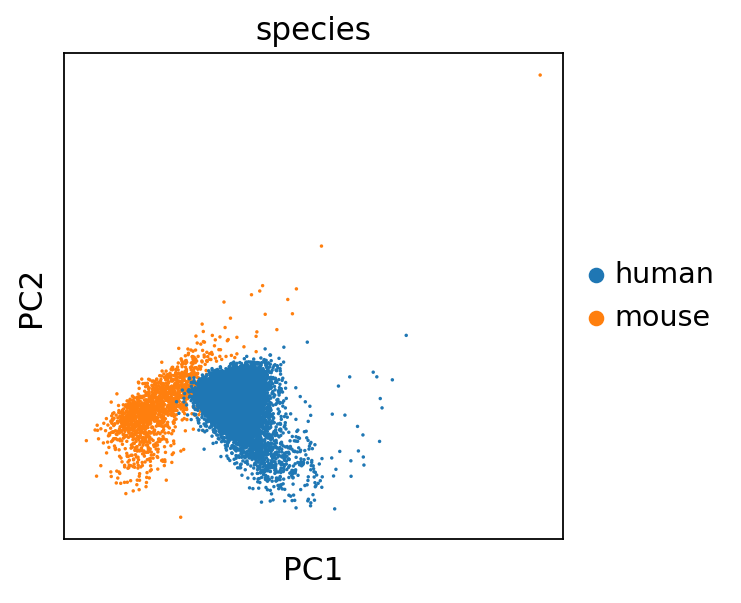

In [37]:
sc.pl.pca(adatas, color = 'species')

# Before integration

In [26]:
sc.pp.neighbors(adatas, key_added='raw',n_pcs=10)

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['raw']`
    `.obsp['raw_distances']`, distances for each pair of neighbors
    `.obsp['raw_connectivities']`, weighted adjacency matrix (0:00:13)


In [27]:
adatas

AnnData object with n_obs × n_vars = 12417 × 3631
    obs: 'Barcode', 'Library', 'Major_cell_type', 'Minor_subset', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'label_singleR', 'leiden', 'lymphoid', 'label_rough', 'label_subtype', 'species'
    var: 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'species_colors', 'raw'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'raw_distances', 'raw_connectivities'

In [28]:
sc.tl.umap(adatas, neighbors_key='raw')

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


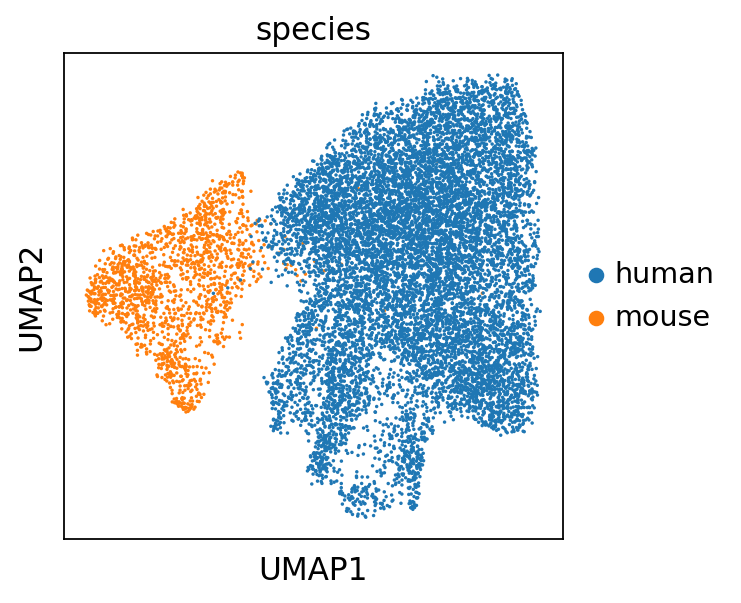

In [29]:
sc.pl.umap(adatas, color='species')

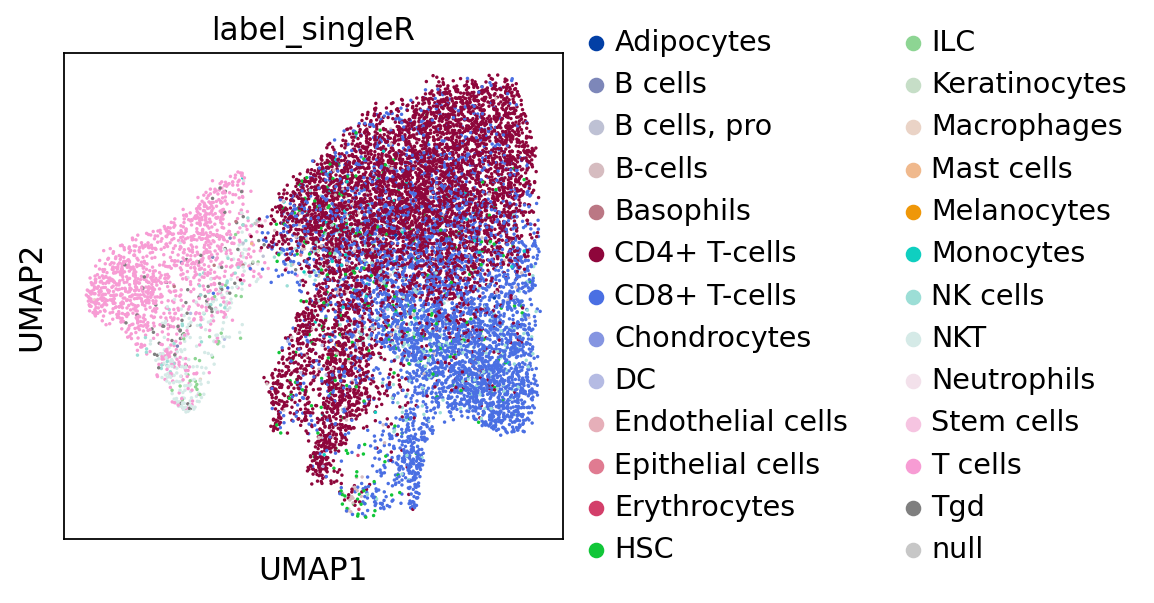

In [30]:
sc.pl.umap(adatas, color='label_singleR')

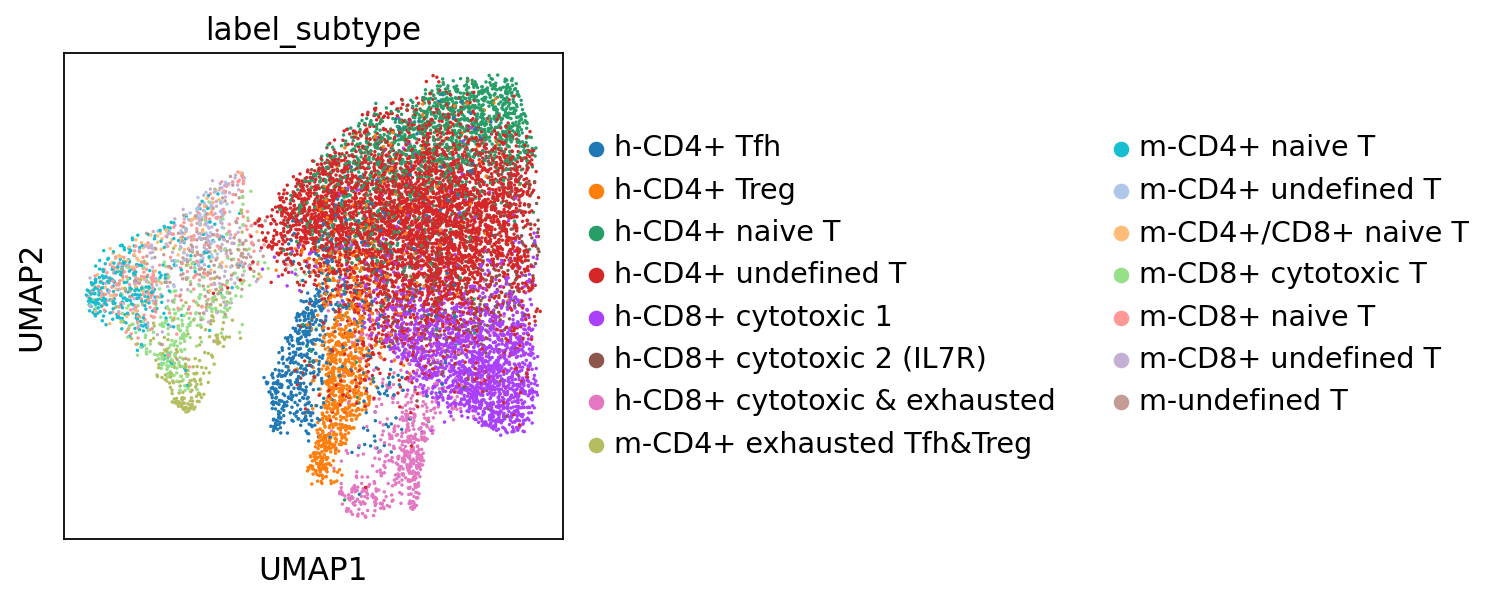

In [31]:
sc.pl.umap(adatas, color='label_subtype')

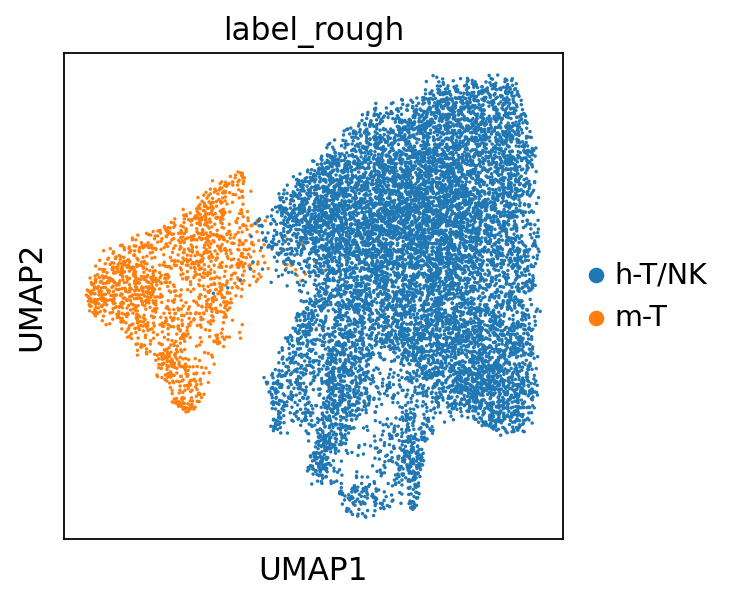

In [32]:
sc.pl.umap(adatas, color='label_rough')

# Integration by harmony
integrate datasets with harmony

batch corrected pca obtained and X_pca_harmony added to the obsm

In [38]:
sce.pp.harmony_integrate(adatas, 'Library') 

2022-05-18 00:43:05,508 - harmonypy - INFO - Iteration 1 of 10
2022-05-18 00:43:12,516 - harmonypy - INFO - Iteration 2 of 10
2022-05-18 00:43:19,561 - harmonypy - INFO - Converged after 2 iterations


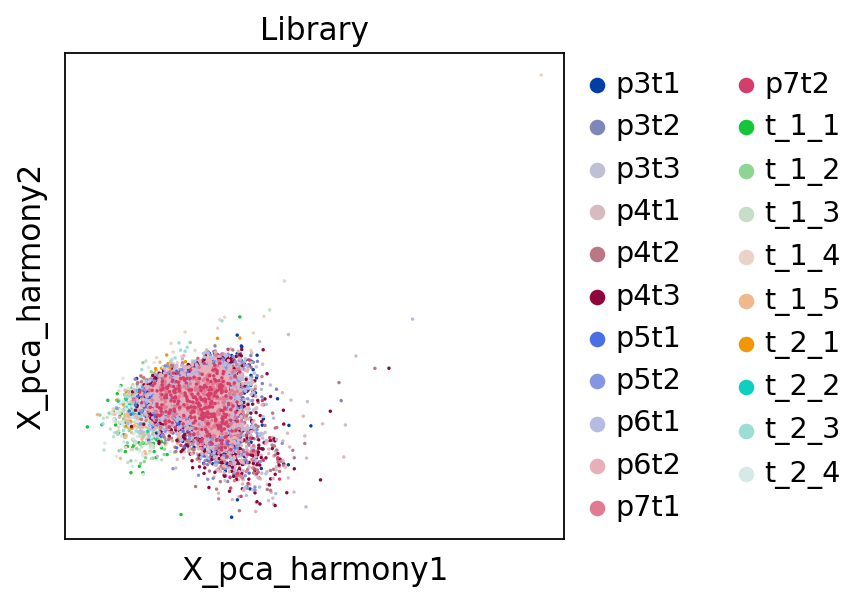

In [39]:
sc.pl.embedding( adatas, basis='X_pca_harmony', color=['Library'])

In [35]:
adatas.write(results_file)

In [40]:
sc.pp.neighbors(adatas, use_rep='X_pca_harmony', n_pcs=13)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)


In [41]:
sc.tl.umap(adatas)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


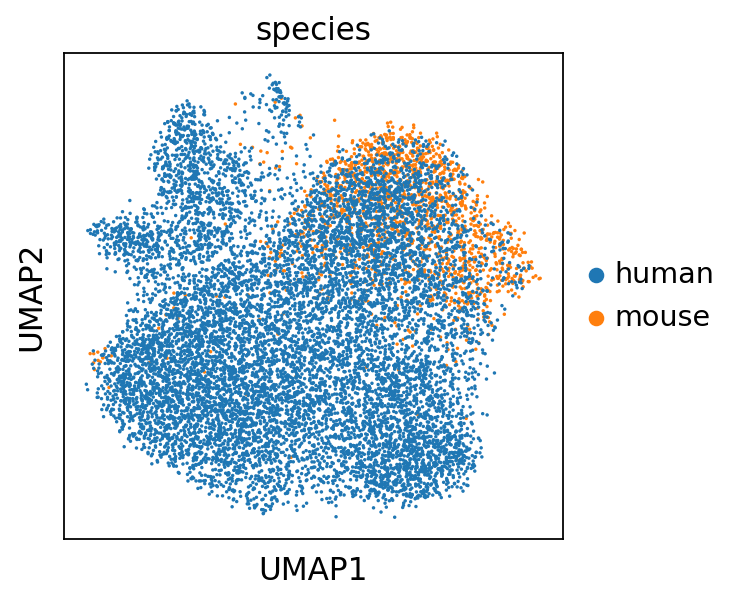

In [42]:
sc.pl.umap(adatas, color='species')

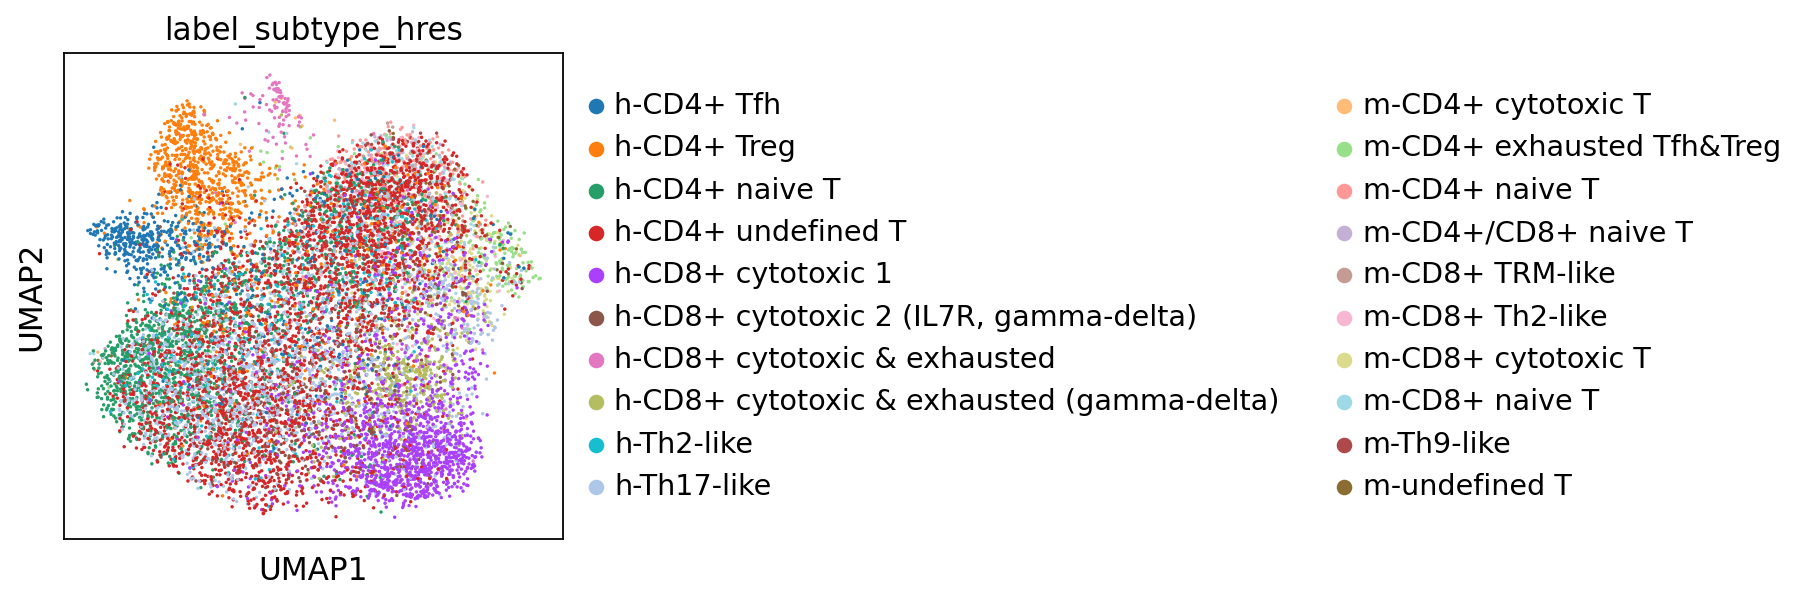

In [43]:
sc.pl.umap(adatas, color='label_subtype_hres')

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1227: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


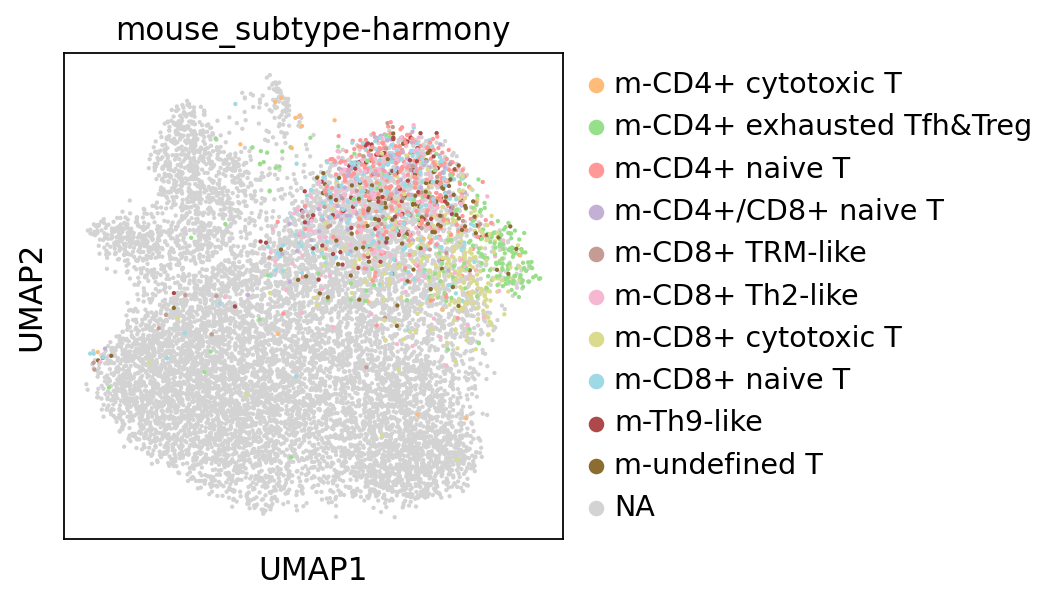

In [54]:
sc.pl.umap(adatas, color=['label_subtype_hres'],size=15, groups=list(adatas[adatas.obs['species']=='mouse',:].obs['label_subtype_hres'].unique()), title='mouse_subtype-harmony')

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1227: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


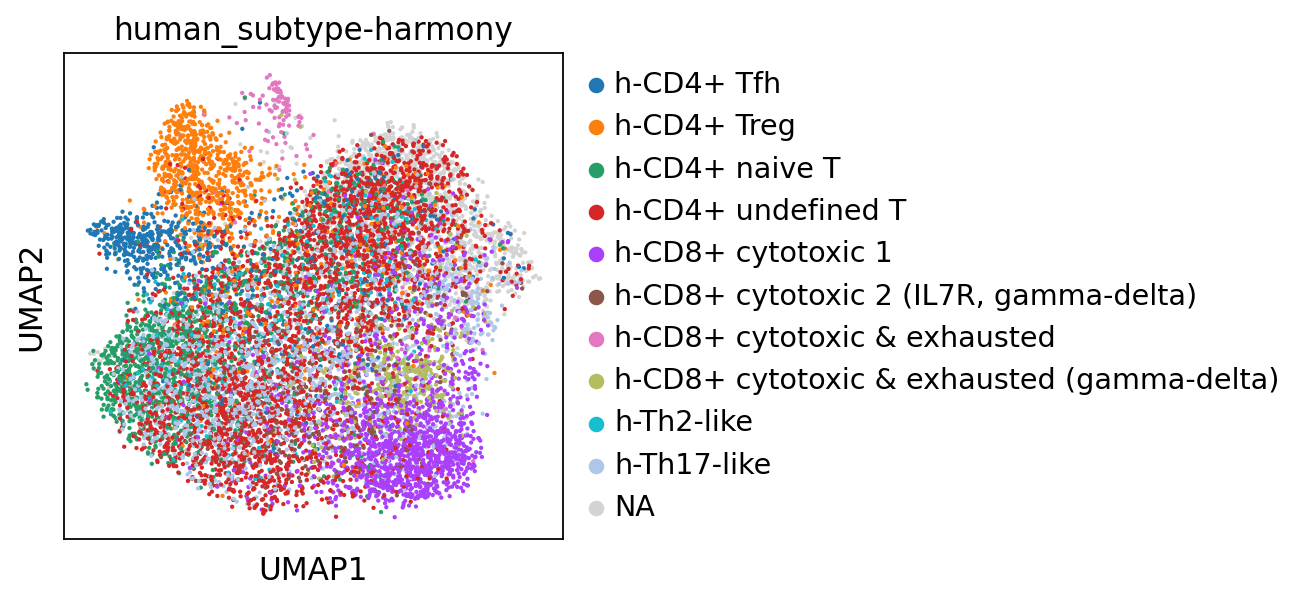

In [53]:
sc.pl.umap(adatas, color='label_subtype_hres',size=15, groups=list(adatas[adatas.obs['species']=='human',:].obs['label_subtype_hres'].unique()), title='human_subtype-harmony')

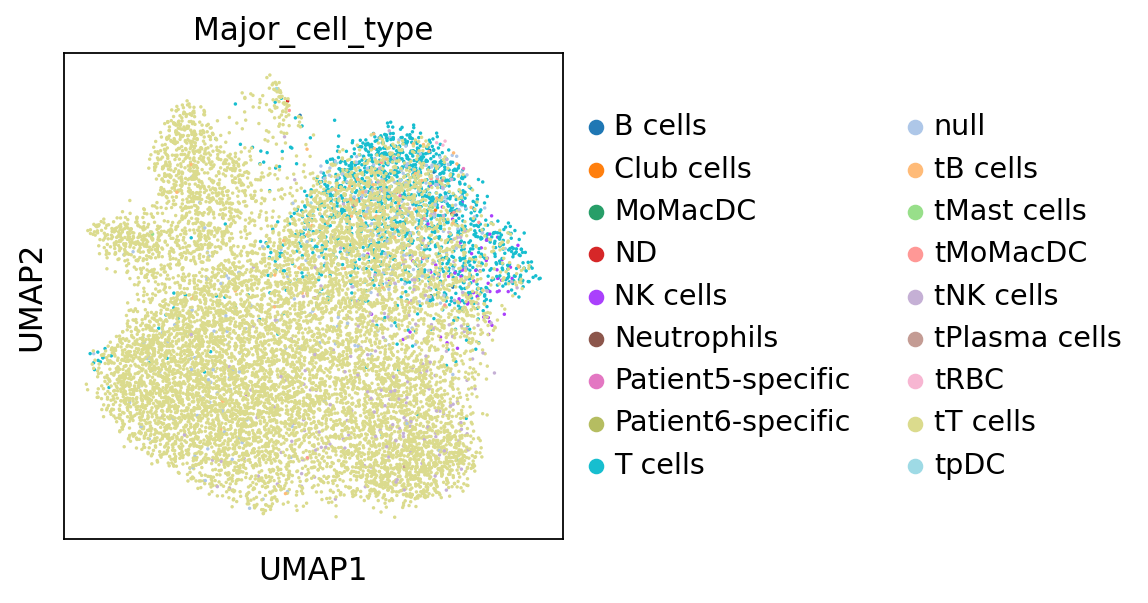

In [50]:
sc.pl.umap(adatas, color='Major_cell_type')

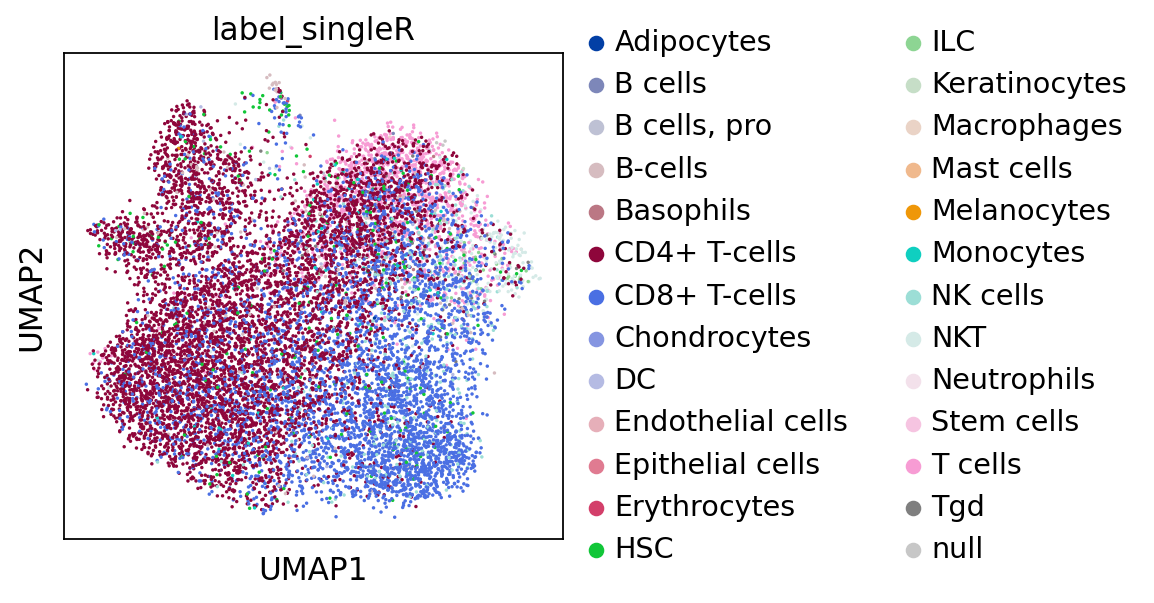

In [51]:
sc.pl.umap(adatas, color='label_singleR')

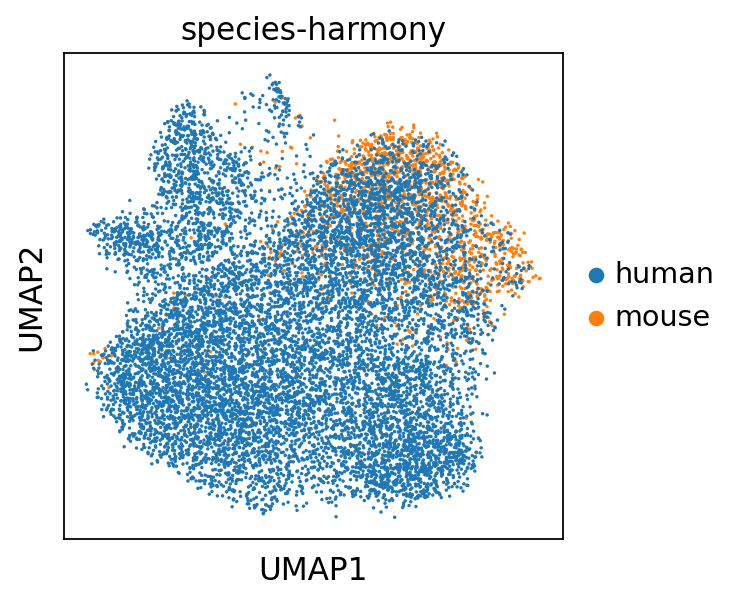

In [62]:
sc.pl.umap(adatas, color='species', title='species-harmony')

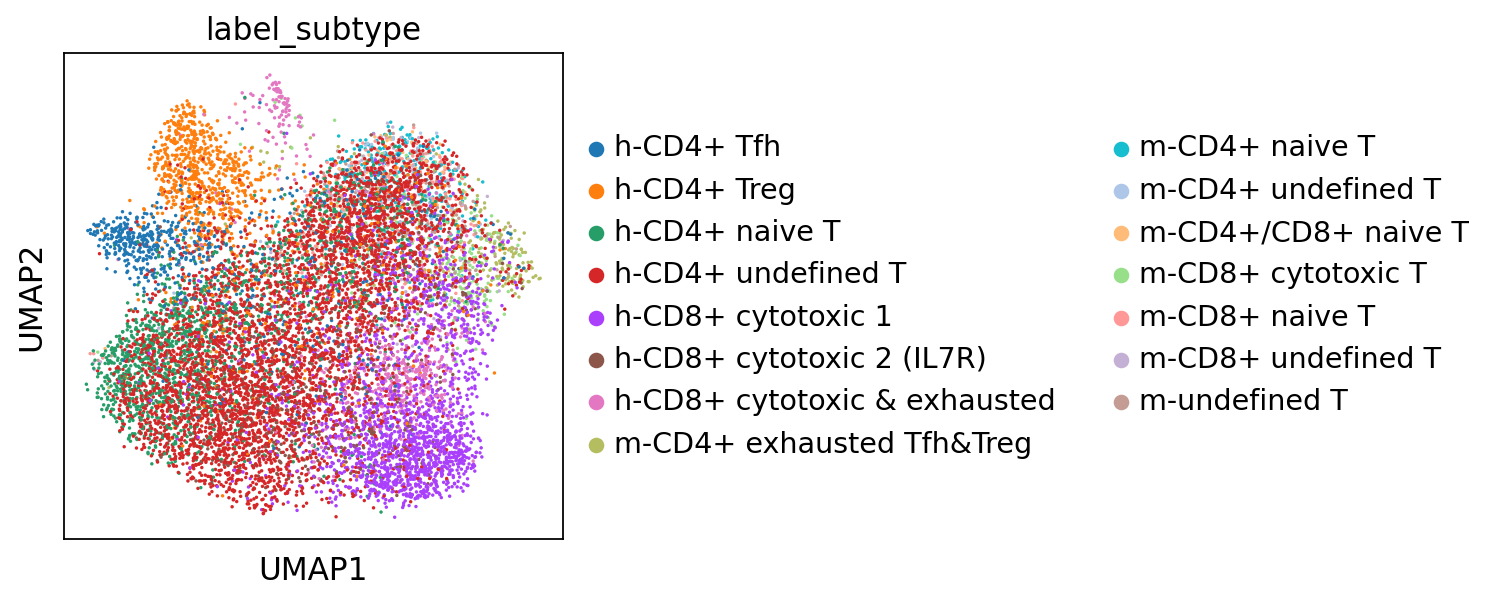

In [53]:
sc.pl.umap(adatas, color='label_subtype')

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1227: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


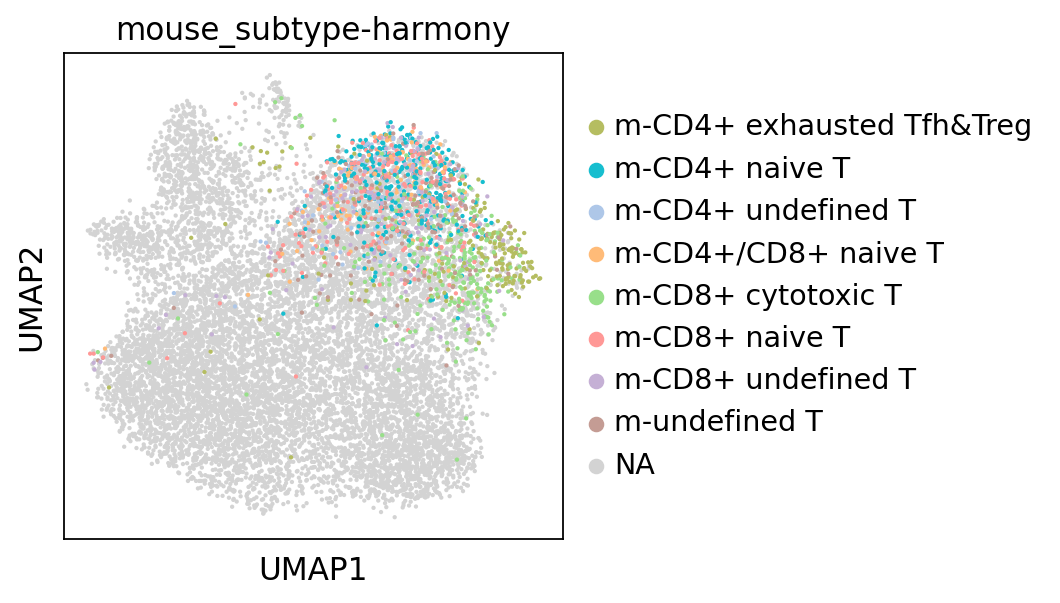

In [49]:
sc.pl.umap(adatas, color=['label_subtype'],size=15, groups=list(adatas[adatas.obs['species']=='mouse',:].obs['label_subtype'].unique()), title='mouse_subtype-harmony')

/home/teach2_pkuhpc/gpfs1/xuzk/Anaconda/envs/py_3.8/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1227: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


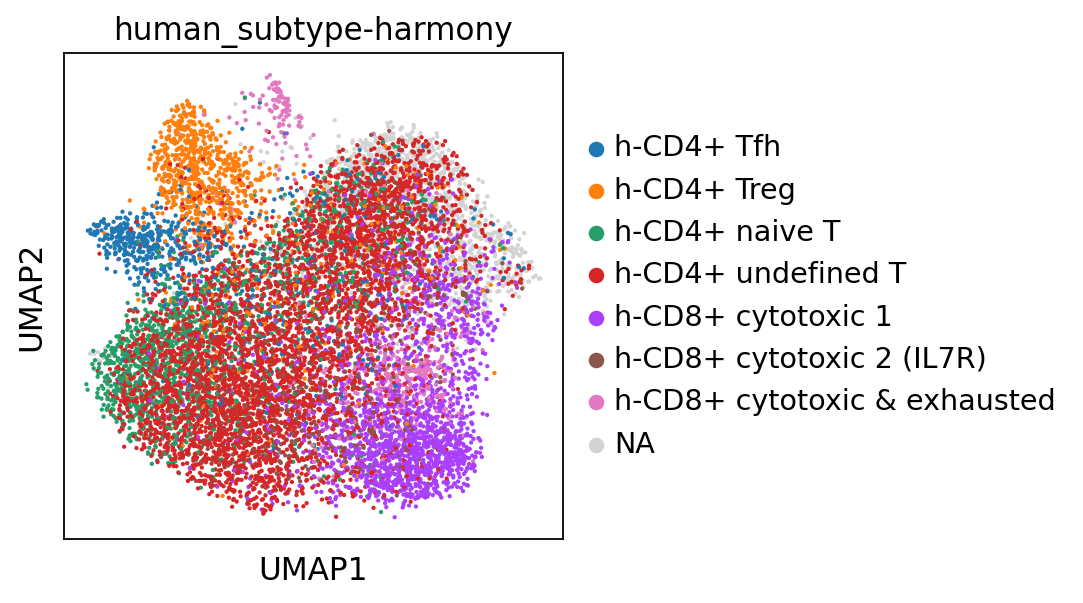

In [50]:
sc.pl.umap(adatas, color=['label_subtype'],size=15, groups=list(adatas[adatas.obs['species']=='human',:].obs['label_subtype'].unique()), title='human_subtype-harmony')

In [63]:
adatas.write(results_file)